<a href="https://colab.research.google.com/github/jj2883/Applied_DL_COMS4995/blob/master/App_DL_HW2_Part2_P1_P2_jj2883.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os

# The code in this notebook should work identically in TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.applications import MobileNet, NASNetMobile, DenseNet121, VGG16 
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

# Part2 P1

I have taken images of three statues on the campus which are Amringe, Alma Mater, and Le Matelieur. I took the dataset at 2 different times, once at sunny night and once at snowy afternoon. The dataset consists of images of 3 statues at various angles. I initially took a video of the landmarks and used FFmpeg to extract 4 images(frames) per second. Since the extracted images are in a sequential order and the adjacent images are very similar to each other, I evenly split the image by assigning every 1st, 3rd, 5th and 7th images as the training set, every 2nd and 6th images as the validation set and every 3rd image as the test set.

In [0]:
#mount google drive
from google.colab import drive, files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/App_DL_hw2/app_DL_hw2_dataset"

test  train  validation


In [0]:
base_dir = '/content/drive/My Drive/App_DL_hw2/app_DL_hw2_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_mater_dir = os.path.join(train_dir, 'mater')
train_matelier_dir = os.path.join(train_dir, 'matelier')
train_amringe_dir = os.path.join(train_dir, 'amringe')

validation_mater_dir = os.path.join(validation_dir, 'mater')
validation_matelier_dir = os.path.join(validation_dir, 'matelier')
validation_amringe_dir = os.path.join(validation_dir, 'amringe')


test_mater_dir = os.path.join(test_dir, 'mater')
test_matelier_dir = os.path.join(test_dir, 'matelier')
test_amringe_dir = os.path.join(test_dir, 'amringe')

In [0]:
num_mater_tr = len(os.listdir(train_mater_dir))
num_matelier_tr = len(os.listdir(train_matelier_dir))
num_amringe_tr = len(os.listdir(train_amringe_dir))

num_mater_val = len(os.listdir(validation_mater_dir))
num_matelier_val = len(os.listdir(validation_matelier_dir))
num_amringe_val = len(os.listdir(validation_amringe_dir))

num_mater_test = len(os.listdir(test_mater_dir))
num_matelier_test = len(os.listdir(test_matelier_dir))
num_amringe_test = len(os.listdir(test_amringe_dir))

total_train = num_mater_tr + num_matelier_tr + num_amringe_tr
total_val = num_mater_val + num_matelier_val + num_amringe_val
total_test = num_mater_test + num_matelier_test + num_amringe_test

In [0]:
print('Training mater images:', num_mater_tr)
print('Training matelier images:', num_matelier_tr)
print('Training amringe images:', num_amringe_tr)

print('Validation mater images:', num_mater_val)
print('Validation matelier images:', num_matelier_val)
print('Validation amringe images:', num_amringe_val)


print('Test mater images:', num_mater_test)
print('Test matelier images:', num_matelier_test)
print('Test amringe images:', num_amringe_test)

print("--")

print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_test)

Training mater images: 115
Training matelier images: 137
Training amringe images: 110
Validation mater images: 50
Validation matelier images: 53
Validation amringe images: 52
Test mater images: 25
Test matelier images: 28
Test amringe images: 27
--
Total training images: 362
Total validation images: 155
Total test images: 80


In [0]:
TARGET_SHAPE = 150 
BATCH_SIZE = 32

#create train ImageDataGenerator
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#feed in training dataset into ImageDataGenerator Object to get augmented training dataset
train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Create validation dataset without any augmentation
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')

# Create test dataset without any augmentation
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=test_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')

Found 362 images belonging to 3 classes.
Found 155 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


## Display Sample Training Images

In [0]:
sample_training_images, sample_training_labels = next(train_data_gen)


In [0]:
# This function will plot images in a grid with 1 row and 5 columns
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

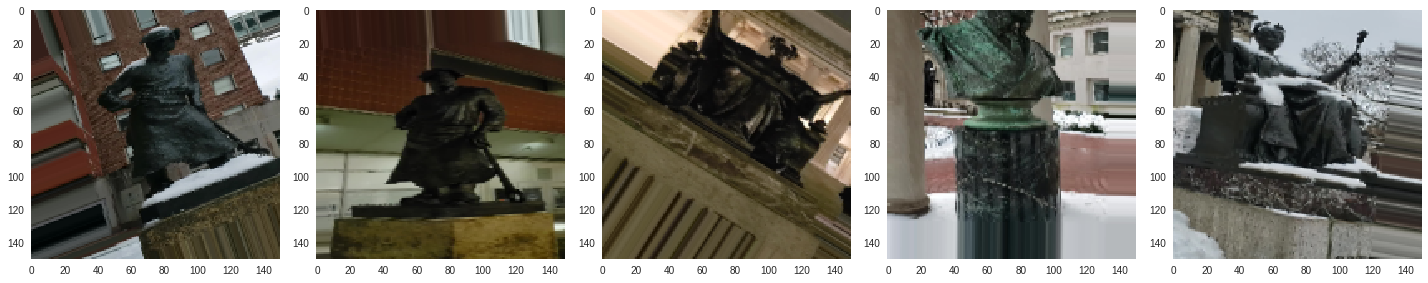

In [0]:
#plot training images
plotImages(sample_training_images[:5])

# Part2 P2
I have chosen VGG16 as the model, and I apply the transfer learning onto the VGG16 model that was trained on Imagenet Dataset.

In [0]:
#download pretrained vgg16 model
vgg16_conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


In [0]:
vgg16_conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
#build a new model with trained vgg16
vgg16_model = Sequential()
vgg16_model.add(vgg16_conv_base)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(3, activation='softmax'))

In [0]:
vgg16_model.summary()
#dont allow weight to be updated in pretrained VGG16 model
vgg16_conv_base.trainable = False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 18,911,043
Trainable params: 18,911,043
Non-trainable params: 0
_________________________________________________________________


In [0]:
EPOCHS = 40


In [0]:
#select the loss function and optimizer
vgg16_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train Transfer Learning
vgg16_history = vgg16_model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
5/5 [==============================] - 39s 8s/step - loss: 0.4427 - acc: 0.7355
 - 119s - loss: 2.2186 - acc: 0.5691 - val_loss: 0.4427 - val_acc: 0.7355
Epoch 2/40
5/5 [==============================] - 8s 2s/step - loss: 0.0775 - acc: 1.0000
 - 10s - loss: 0.4064 - acc: 0.8481 - val_loss: 0.0775 - val_acc: 1.0000
Epoch 3/40
5/5 [==============================] - 8s 2s/step - loss: 0.0279 - acc: 1.0000
 - 17s - loss: 0.1966 - acc: 0.9475 - val_loss: 0.0279 - val_acc: 1.0000
Epoch 4/40
5/5 [==============================] - 8s 2s/step - loss: 0.0182 - acc: 1.0000
 - 16s - loss: 0.0799 - acc: 0.9890 - val_loss: 0.0182 - val_acc: 1.0000
Epoch 5/40
5/5 [==============================] - 8s 2s/step - loss: 0.0110 - acc: 1.0000
 - 16s - loss: 0.0673 - acc: 0.9779 - val_loss: 0.0110 - val_acc: 1.0000
Epoch 6/40
5/5 [==============================] - 8s 2s/step - loss: 0.0116 - acc: 1.0000
 - 16s - loss: 0.0591 - acc: 0.9862 - val_los

## Plot Training and Validation Loss and Accuracy

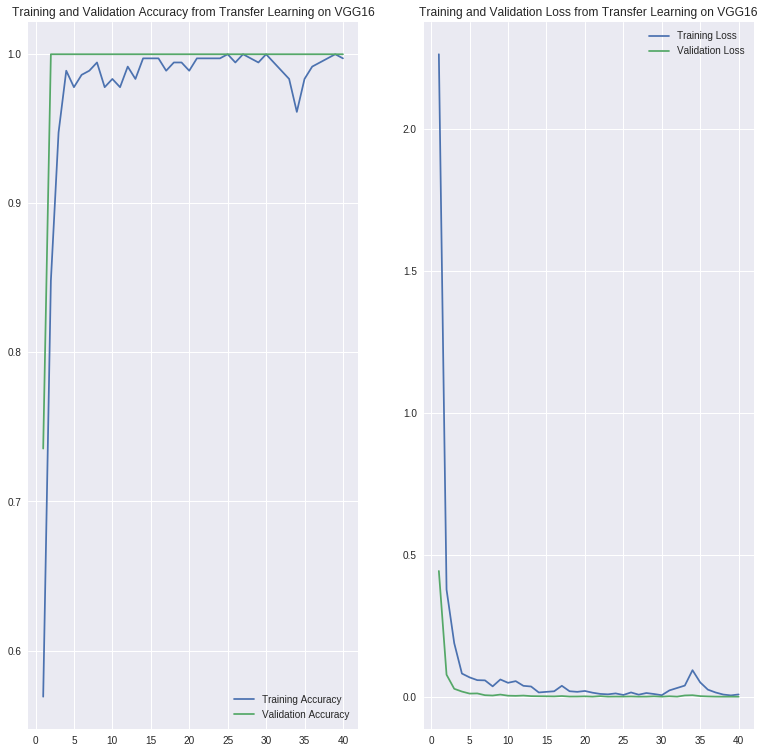

In [0]:
acc = vgg16_history.history['acc']
val_acc = vgg16_history.history['val_acc']

loss = vgg16_history.history['loss']                                              
val_loss = vgg16_history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(13,13))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy from Transfer Learning on VGG16')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss from Transfer Learning on VGG16')
plt.show()

## Show Testing Loss and Accuracy

In [0]:
vgg16_test_loss, vgg16_test_accuracy = vgg16_model.evaluate(test_data_gen, verbose=1)

3/3 [==============================] - 20s 7s/step - loss: 8.6096e-04 - acc: 1.0000


In [21]:
print('The test accuracy is 0.000861 and the test loss is 1.')

The test accuracy is 0.000861 and the test loss is 1.


## Observation
I observe that the validation loss is smaller than the training loss. I suspect this is due to the augmentation done on the training dataset. The training dataset was augmented to prevent overfitting, and during the training phase, the testing loss if fairly large because every training data seen by the model is 'unique' and 'never-seen-before'. In addition, the validation dataset were very similar to the images in training dataset as they were split from sequentially collected images from a video. Therefore, it is possible that the unaugmented validation dataset to have lower validation loss than the training loss.